In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Merging 12 months of sales data into a single file 

In [46]:
#List all months
files = [file for file in os.listdir('C:\\Users\\Asus\\Desktop\\Project\\Python\\Untitled Folder\\Sales_Data')]

#Concatenate all months
all_month = pd.DataFrame()
for file in files:
    each_month = pd.read_csv('C:\\Users\\Asus\\Desktop\\Project\\Python\\Untitled Folder\\Sales_Data\\' + file)
    all_month = pd.concat([all_month, each_month])
all_month.to_csv('all_months.csv', index=False)

In [47]:
data = pd.read_csv('all_months.csv')

In [48]:
data.shape

(186850, 6)

In [49]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Cleaning Data

In [50]:
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [51]:
data_copy = data.copy()

In [52]:
data_copy.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [57]:
data_copy.dropna(inplace=True)

In [60]:
data_copy.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [92]:
data_copy['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [98]:
data_copy[data_copy['Price Each']=='Price Each'].count()

Order ID            355
Product             355
Quantity Ordered    355
Price Each          355
Order Date            0
Purchase Address    355
dtype: int64

In [99]:
data_drop = data_copy[data_copy['Price Each']!='Price Each']

In [100]:
data_drop.shape

(185950, 6)

In [103]:
data_drop['Order Date']=pd.to_datetime(data_drop['Order Date'], errors='coerce', format="%d/%m/%Y")
data_drop['Order ID']=pd.to_numeric(data_drop['Order ID'])
data_drop['Quantity Ordered']=pd.to_numeric(data_drop['Quantity Ordered'])
data_drop['Price Each']=pd.to_numeric(data_drop['Price Each'])

C:\Users\Asus\AppData\Local\Temp\ipykernel_22112\1811838878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Order Date']=pd.to_datetime(data_drop['Order Date'], errors='coerce', format="%d/%m/%Y")
C:\Users\Asus\AppData\Local\Temp\ipykernel_22112\1811838878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Order ID']=pd.to_numeric(data_drop['Order ID'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_22112\1811838878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [104]:
data_drop.dtypes

Order ID                     int64
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

# What was the best month for sales? How much was earned that month?

In [105]:
data_drop.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [115]:
data_drop['Total Sales']=data_drop['Quantity Ordered']*data_drop['Price Each']
data_drop['Month']=data_drop['Order Date'].dt.month

C:\Users\Asus\AppData\Local\Temp\ipykernel_22112\2951495167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Total Sales']=data_drop['Quantity Ordered']*data_drop['Price Each']
C:\Users\Asus\AppData\Local\Temp\ipykernel_22112\2951495167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Month']=data_drop['Order Date'].dt.month


In [116]:
data_drop.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99


In [117]:
data_drop.groupby('Month')['Total Sale'].sum().sort_values(ascending=False)

Month
12    4613443.34
10    3736726.88
4     3390670.24
11    3199603.20
5     3152606.75
3     2807100.38
7     2647775.76
6     2577802.26
8     2244467.88
2     2202022.42
9     2097560.13
1     1822256.73
Name: Total Sale, dtype: float64

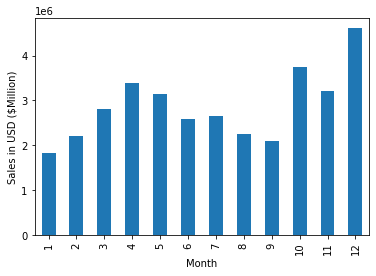

In [170]:
bar = data_drop.groupby('Month')['Total Sale'].sum().plot(kind='bar')
bar.set_xlabel('Month')
bar.set_ylabel('Sales in USD ($Million)')
plt.show()

# What city sold the most product? 

In [120]:
data_drop.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,Month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99


In [124]:
data_drop[['Street', 'City', 'Code']] = data_drop['Purchase Address'].str.split(pat=',', expand=True)
#data_drop['City'] = data_drop['Purchase Address'].apply(lambda x: x.split(',')[1])
#data_drop['City'] = data_drop['Purchase Address'].str.split(',',expand=True)[1]

C:\Users\Asus\AppData\Local\Temp\ipykernel_22112\1875327298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop[['Street', 'City', 'Code']] = data_drop['Purchase Address'].str.split(pat=',', expand=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_22112\1875327298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop[['Street', 'City', 'Code']] = data_drop['Purchase Address'].str.split(pat=',', expand=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_22112\1875327298.py:1: SettingWithCopyWar

In [126]:
data_drop.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,Month,Total Sales,Street,City,Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99,333 8th St,Los Angeles,CA 90001


In [179]:
data_drop.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)

City
 San Francisco    50239
 Los Angeles      33289
 New York City    27932
 Boston           22528
 Dallas           16730
 Atlanta          16602
 Seattle          16553
 Portland         14053
 Austin           11153
Name: Quantity Ordered, dtype: int64

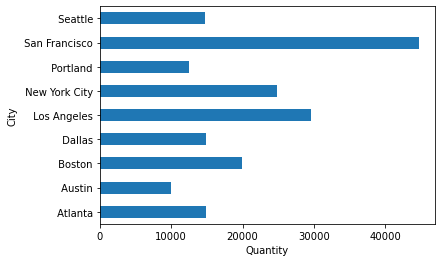

In [183]:
quantity_by_city = data_drop.groupby('City')['Quantity Ordered'].count().plot.barh(x='City', y='Sales Quantity')
quantity_by_city.set_xlabel('Quantity')
quantity_by_city.set_ylabel('City')
plt.show()

# What time should we display advertisements to maximize the likelihood of purchases?

In [142]:
data_drop.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,Month,Total Sales,Street,City,Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99,333 8th St,Los Angeles,CA 90001


In [186]:
data_drop['Order Date'].dt.hour.value_counts()

19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Order Date, dtype: int64

# What products are most often sold together?

In [153]:
data_drop.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,Month,Total Sales,Street,City,Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99,333 8th St,Los Angeles,CA 90001


In [207]:
data_drop[data_drop['Order ID'].duplicated(keep=False)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,Month,Total Sales,Street,City,Code
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99,669 Spruce St,Los Angeles,CA 90001
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,4,600.00,20 Hill St,Los Angeles,CA 90001
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,4,11.95,20 Hill St,Los Angeles,CA 90001
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,4,99.99,823 Highland St,Boston,MA 02215
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",3.84,9,3.84,106 7th St,Atlanta,GA 30301
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",11.99,9,11.99,241 Highland St,Atlanta,GA 30301
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",5.98,9,5.98,241 Highland St,Atlanta,GA 30301
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",600.00,9,600.00,519 Maple St,San Francisco,CA 94016


In [213]:
data_drop['Grouped'] = data_drop.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

C:\Users\Asus\AppData\Local\Temp\ipykernel_22112\4225377816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_drop['Grouped'] = data_drop.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))


In [214]:
data_drop

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,Month,Total Sales,Street,City,Code,Grouped
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90,917 1st St,Dallas,TX 75001,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99,682 Chestnut St,Boston,MA 02215,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00,669 Spruce St,Los Angeles,CA 90001,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99,669 Spruce St,Los Angeles,CA 90001,"Google Phone, Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99,333 8th St,Los Angeles,CA 90001,Wired Headphones
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,9,8.97,840 Highland St,Los Angeles,CA 90001,AAA Batteries (4-pack)
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,700.00,216 Dogwood St,San Francisco,CA 94016,iPhone
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,9,700.00,220 12th St,San Francisco,CA 94016,iPhone
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,9,379.99,511 Forest St,San Francisco,CA 94016,34in Ultrawide Monitor


In [215]:
data_group = data_drop[['Order ID', 'Grouped']].drop_duplicates()

In [217]:
data_group['Grouped'].value_counts()

Lightning Charging Cable                                                                      19831
AAA Batteries (4-pack)                                                                        19826
AA Batteries (4-pack)                                                                         19809
USB-C Charging Cable                                                                          19792
Wired Headphones                                                                              17208
Apple Airpods Headphones                                                                      14575
Bose SoundSport Headphones                                                                    12505
27in FHD Monitor                                                                               7213
27in 4K Gaming Monitor                                                                         5979
34in Ultrawide Monitor                                                                         5935


In [156]:
data_drop.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,Month,Total Sales,Street,City,Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99,333 8th St,Los Angeles,CA 90001
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",11.95,4,11.95,381 Wilson St,San Francisco,CA 94016
7,176563,Bose SoundSport Headphones,1,99.99,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",99.99,4,99.99,668 Center St,Seattle,WA 98101
8,176564,USB-C Charging Cable,1,11.95,2019-04-12 10:58:00,"790 Ridge St, Atlanta, GA 30301",11.95,4,11.95,790 Ridge St,Atlanta,GA 30301
9,176565,Macbook Pro Laptop,1,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",1700.00,4,1700.00,915 Willow St,San Francisco,CA 94016
10,176566,Wired Headphones,1,11.99,2019-04-08 14:05:00,"83 7th St, Boston, MA 02215",11.99,4,11.99,83 7th St,Boston,MA 02215


# What product sold the most? Why do you think it did? 

In [157]:
data_drop.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Sale,Month,Total Sales,Street,City,Code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,23.90,917 1st St,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,99.99,682 Chestnut St,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,600.00,669 Spruce St,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,11.99,669 Spruce St,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,11.99,333 8th St,Los Angeles,CA 90001


In [161]:
data_drop.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        31017
AA Batteries (4-pack)         27635
USB-C Charging Cable          23975
Lightning Charging Cable      23217
Wired Headphones              20557
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
27in FHD Monitor               7550
iPhone                         6849
27in 4K Gaming Monitor         6244
34in Ultrawide Monitor         6199
Google Phone                   5532
Flatscreen TV                  4819
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
20in Monitor                   4129
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

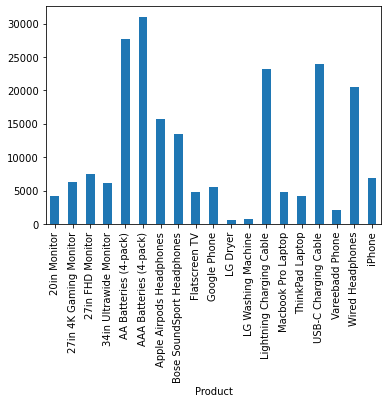

In [193]:
data_drop.groupby('Product')['Quantity Ordered'].sum().plot.bar()
plt.show()